<img src="https://i.ibb.co/DWSqtc1/Encabezado.png" alt="descargar" border="0" width=900px>

# **TITANIC - MACHINE LEARNING FROM DISASTE**

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/3136/logos/header.png" alt="descargar" border="0" height=200px>

> **Link del challenge:** 
>
> https://www.kaggle.com/c/titanic/data

---
> **Data: archive.csv** 
  - Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed eiusmod tempor incidunt 
  - ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquid ex ea commodi consequat.

## COMPRENSIÓN DEL RETO

## IMPORTACION DE LIBRERIAS

In [4]:
# Importando librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
warnings.filterwarnings("ignore")
%matplotlib inline

## RECOPILACIÓN DE LOS DATOS

In [5]:
# Cargamos el archivo
titanic = pd.read_csv("./data/train.csv")

In [7]:
# Visualizamos 5 filas del titanic
# .sample es 5 filas al azar
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
659,660,0,1,"Newell, Mr. Arthur Webster",male,58.0,0,2,35273,113.2750,D48,C
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S
422,423,0,3,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S
580,581,1,2,"Christy, Miss. Julie Rachel",female,25.0,1,1,237789,30.0000,NaN,S


## DESCRIPCION DE LOS DATOS

In [9]:
titanic.shape

# INTERPRETACION:
# 891 observaciones
# 12 features/variables

(891, 12)

**Información acerca de la data "train"**

|Variable| Definicion  | Llave |
|--|--|--|
| **survival**|	Supervivencia	| 0 = No, 1 = Sí
| **pclass**|	Clase de entrada	| 1 = alto, 2 = medio, 3 = bajo
| **sex**|	Sexo	|
| **Age**|	Edad en años	|
| **sibsp**|	# de hermanos / cónyuges a bordo del Titanic	|
| **parch**|	# de padres / hijos a bordo del Titanic	|
| **ticket**|	Numero de ticket	|
| **fare**|	Tarifa de pasajero	|
| **cabin**|	Número de cabina	|
| **embarked**|	Puerto de embarque |	C = Cherburgo, Q = Queenstown, S = Southampton

# **RETO A RESOLVER!**
**¿Cuál es la tasa de supervivencia por GÉNERO, CLASE Y EMBARQUE?**.
Acompaña tu respuesta con un grafico

# RESOLUCION

In [12]:
# Nombrar nuestra dataFrame y luego visualizarlo
titanic.columns.name = "Datos de pasajeros del Titanic"
titanic.index.name = "Pasajero"
titanic.head(5)

Datos de pasajeros del Titanic,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pasajero,,,,,,,,,,,,
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
dataset_titanic = titanic

In [14]:
print(dataset_titanic.shape) # nro de casos, nro de columnas
nro_casos = dataset_titanic.shape[0]
print(f'Numero de casos: {nro_casos}')

(891, 12)
Numero de casos: 891


In [15]:
# Informacion que nos proporciona nuestro dataset
dataset_titanic.info()

# -- OBSERVACIONES
# Se observa que se tiene 3 variables con datos faltantes: Age, Cabin, Embarked. 
# dataset_titanic.dtypes == object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
dataset_titanic.isnull() # Matriz de booleano si es null cada dato
dataset_titanic.isnull().sum()  # Cantidad de datos nulos por cada variable

Datos de pasajeros del Titanic
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
# Describir nuestro dataset - variables numericas
dataset_titanic.describe()

# -- OBSERVACIONES

# PassengerId - No es de interes id del pasajero

# Survived - NUMERICO - CATEGORIZAR esta variable - TARGET
# Pclass - NUMERICO - CATEGORIZAR esta variable

#   Age
# - Edad menor 0.42 (bebe)
# - Edad maxima 80
# - El 75% de los pasajeros tienen <= 38 años (Adultas)
# - El 25% de los pasajeros son < 20 años
# - El 50% de los pasajeros tenian entre 20 y 38 años
# - El std = 14.5 => nuestros valores tienen mucha dispersion
# - El cv = 14.5/29.7 = 0.49 => datos no homogeneos

#   SibSp (#Hermanos / conyuges a bordo del titanic)
# - Solo el 25% de los pasajeros fueron con mas de un acompañante
# - Datos dispersos y no homogeneos

#   Parch (#Padres / hijos a bordo del titanic)
# - el 75 % de los pasajeros fueron sin hijos / padres
# - Datos dispersos y no homogeneos

#   Fare - Tarifa del pasajero
# - el 25 % de los pasajeros pagaron desde 31 hasta 512 para ingresar
# - Datos dispersos y no homogeneos

Datos de pasajeros del Titanic,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


0    549
1    342
Name: Survived, dtype: int64

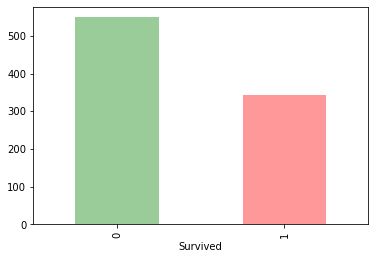

In [18]:
# VARIABLE: Survived

agrupacion_sobrevivientes = dataset_titanic.groupby(["Survived"]).size();
agrupacion_sobrevivientes.plot.bar(color=["green","red"], alpha=0.4);

# Conteo de si sobrevivieron
dataset_titanic['Survived'].value_counts()

# -- OBSERVACIONES
# 0-549 Personas murieron 
# 1-342 Personas sobrevivieron

In [19]:
# VARIABLE: Age

dataset_titanic["Age"].describe()
# dataset_titanic['Age'].min(), dataset_titanic['Age'].max()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:title={'center':'Grafico de personas que sobrevivieron'}>

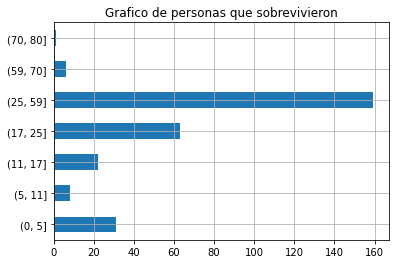

In [20]:
# AGRUPANDO POR INTERVALOS DE EDAD

bins=[0,5,11,17,25,59,70,80]
dataset_titanic['agebin']=pd.cut(dataset_titanic['Age'],bins)
dataset_titanic[
    dataset_titanic['Survived']==1]['agebin'].value_counts().sort_index().plot(
    kind='barh', grid="True", title="Grafico de personas que sobrevivieron")

In [21]:
# PORCENTAJE DE SOBREVIVIENTES EN FUNCION AL INTERVALO DE EDAD 
num_sobrevivientes = dataset_titanic['Survived'].value_counts()[1]
dataset_titanic[dataset_titanic['Survived']==1]['agebin'].value_counts().sort_values(ascending=False)/num_sobrevivientes



(25, 59]    0.464912
(17, 25]    0.184211
(0, 5]      0.090643
(11, 17]    0.064327
(5, 11]     0.023392
(59, 70]    0.017544
(70, 80]    0.002924
Name: agebin, dtype: float64

male      577
female    314
Name: Sex, dtype: int64

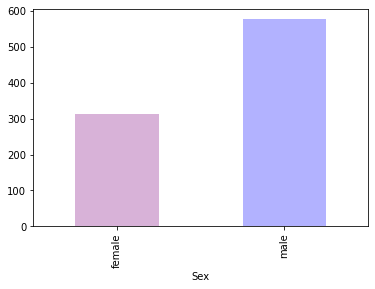

In [22]:
# VARIABLE: Sex

agrupacion_sex = dataset_titanic.groupby(["Sex"]).size()
agrupacion_sex.plot.bar(color=["purple","blue"],alpha=0.3);
# Conteo
dataset_titanic['Sex'].value_counts()

# -- OBSERVACIONES
# 577 Personas son hombres
# 314 Personas son mujeres

Text(0.5, 1.0, 'Grafico de pasajeros por genero')

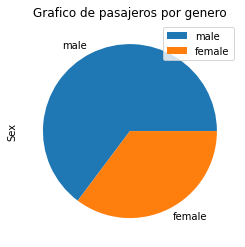

In [23]:
 # OTRA FORMA - ṔROF ESTADISTICA
dataset_titanic['Sex'].value_counts().plot(kind='pie',legend="True");
plt.title("Grafico de pasajeros por genero")

3    491
1    216
2    184
Name: Pclass, dtype: int64

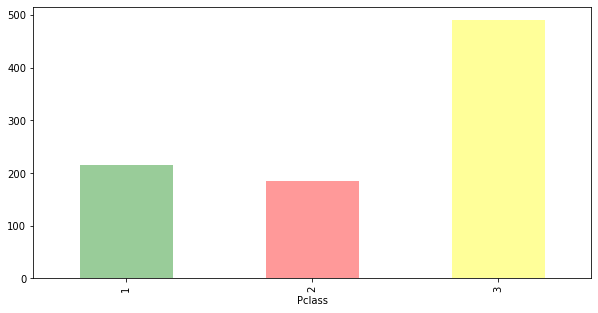

In [24]:
# VARIABLE: Pclass

fig = plt.figure(figsize=(10,5))# figsize=(ANCHO,LARGO)
agrupacion_clases= dataset_titanic.groupby(["Pclass"]).size();
agrupacion_clases.plot.bar(color=["green","red", "yellow"], alpha=0.4);

# Conteo de si sobrevivieron
dataset_titanic['Pclass'].value_counts()

# -- OBSERVACIONES
# 1-216 Personas con tipo de entrada alto
# 2-184 Personas con tipo de entrada medio
# 3-491 Personas con tipo de entrada bajo

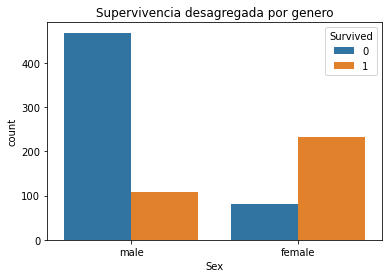

In [26]:
# VARIABLES Sex vs Survived

sns.countplot(x='Sex', hue='Survived', data=dataset_titanic)
plt.title('Supervivencia desagregada por genero')
plt.show()

# -- OBSERVACIONES
# 0 NO sobrevivieron / 1 SI sobrevivieron
# Hubo mas hombres fallecidos con respecto a la mujeres

In [27]:
# Tablas de contingencia de dos variables
survived_sex = pd.crosstab(index = dataset_titanic['Survived'],
                          columns = dataset_titanic['Sex'],
                          margins=True)
survived_sex.index = ['Fallecio', 'Sobrevivio','Total']
survived_sex.columns = ['Mujer', 'Hombre', 'Total']
survived_sex

# -- OBSERVACIONES

,Mujer,Hombre,Total
Fallecio,81,468,549
Sobrevivio,233,109,342
Total,314,577,891


<AxesSubplot:xlabel='Survived', ylabel='Age'>

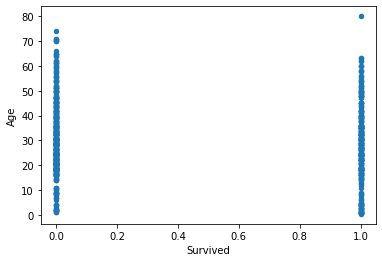

In [28]:
# VARIABLES Age vs Survived

dataset_titanic.plot(kind='scatter', x='Survived',y='Age') 

# -- OBSERVACIONES
# Que la supervivencias o no no tiene relacion con las edades

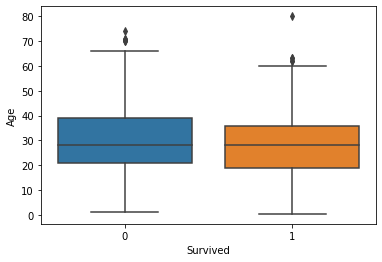

In [30]:
# VARIABLES Age vs Survived

sns.boxplot(x="Survived",y="Age",data=titanic)
plt.show()

# -- OBSERVACIONES
# El 50% de los datos que posee mas casos son los sobrevivientes

In [31]:
# VARIABLES Sex vs Survived vs clase de entrada

surv_sex_class = pd.crosstab(index = dataset_titanic['Survived'],
                            columns = [dataset_titanic['Sex'],dataset_titanic['Pclass']],
                            margins = True)
surv_sex_class.index = ["Fallecio","Sobrevivio","Total"]
surv_sex_class

# -- OBSERVACIONES
# Que hay mas mujeres con clase de entrada mas caras sobrevivientes con respecto a las otras mujeres
# Con respecto a los hombres se observa que la sobrevivencia no importo mucho la clase,
# 300*100/549 = 54.64
# El 54% de las personas fallecidas fueron hombres con tiquet de clase baja
# El 27% de las personas sobrevivientes fueron mujeres con tiquet de clase alta

Sex        female          male            All
Pclass          1   2    3    1    2    3     
Fallecio        3   6   72   77   91  300  549
Sobrevivio     91  70   72   45   17   47  342
Total          94  76  144  122  108  347  891

Text(0.5, 1.0, 'Tarifa del pasajero')

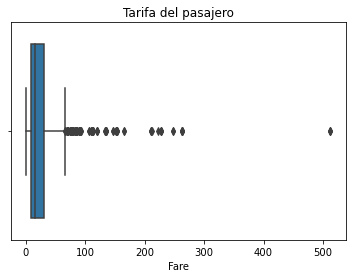

In [33]:
sns.boxplot(dataset_titanic['Fare']).set_title('Tarifa del pasajero')

Text(0.5, 1.0, 'Tarifa del pasajero')

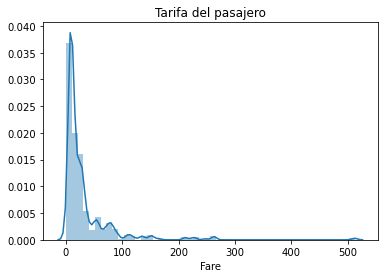

In [34]:
sns.distplot(dataset_titanic['Fare']).set_title('Tarifa del pasajero')

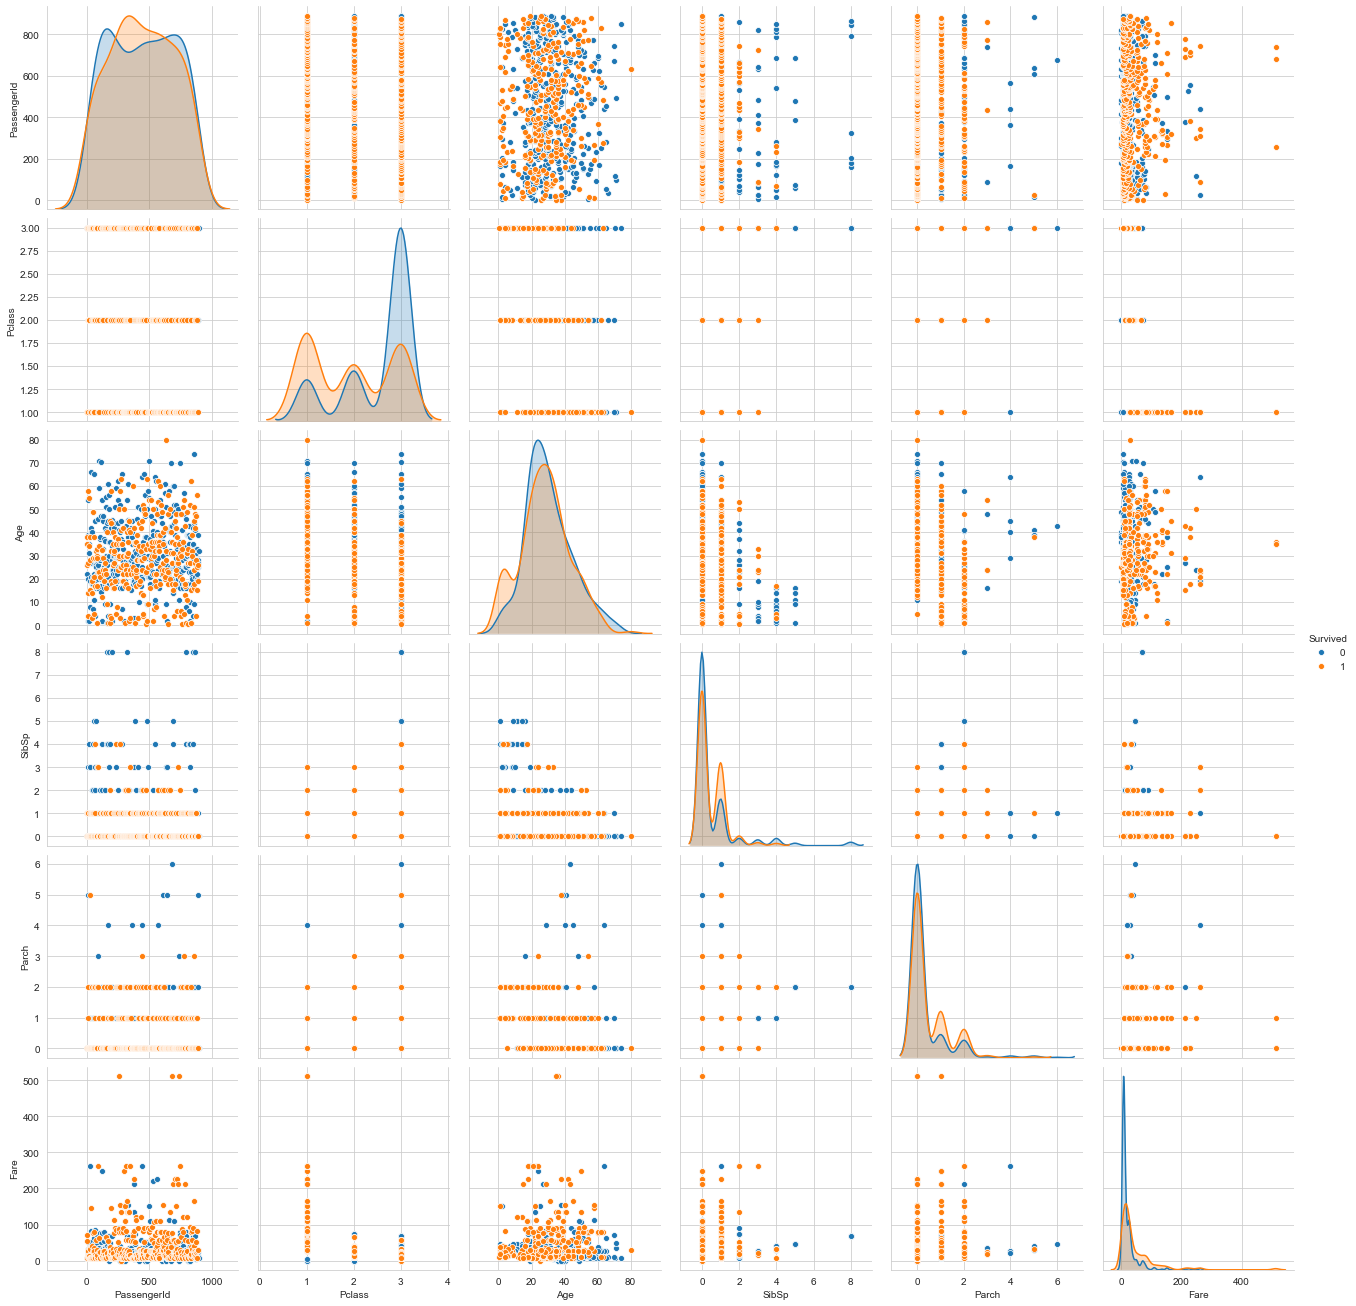

In [36]:
sns.set_style("whitegrid")
sns.pairplot(dataset_titanic,hue="Survived",size=3);
plt.show()